In [1]:
import numpy as np
from keras import layers,models ## ESTRUCTURA BASICA PARA REDES
from keras.datasets import reuters ## IMPORTAMOS LA INFORMACIÓN.
import matplotlib.pyplot as plt

In [2]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [3]:
word_index=reuters.get_word_index()
word_index=dict([(value,key)for (key,value) in word_index.items()])
for _ in train_data[0]:
    print(word_index.get(_ -3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [4]:
train_labels[0]

3

In [5]:
#ojo train data no es tipo tensor observemos:

train_data.shape

(8982,)

In [6]:
## UTILIZAMOS EL COMANDO AXIS 

def vectorizar(sequences, dim=10000):
    results=np.zeros((len(sequences),dim))
    for i ,sequences in enumerate(sequences):
        results[i,sequences]=1
    return results

In [7]:
x_train=vectorizar(train_data)
x_test=vectorizar(test_data)

In [8]:
train_labels[0] ## ES UN ESCALAR Y PARA CLASIFICACIÓN ES MEJOR SEPARARLO EN UN VECTOR

3

In [9]:
## PARA ESO VAMOS A USAR UNA HERRAMIENTO QUE NOS PROPORCIONA KERAS.UTILS TO CATEGORICAL
from keras.utils import to_categorical

In [10]:
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
## CREAMOS NUESTRO MODELO

model=models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation="softmax")) ## SALIDAS DE MI MODELO CADA NEURONA SE DA CUENTA DE UN POSIBLE TIPO

## softmax se lleva muy bien con modelos de clasificación puesto que me da las probabilidades de cada posible salida


In [12]:
##COMPILAMOS EL Modelo
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics="accuracy")  ## CASOS MULTIPLES 


In [13]:
## GENERAMOS NUESTRO SET DE VALIDACIÓN

x_val=x_train[:1000]
partial_x_train=x_train[1000:] #

y_val=y_train[:1000]
partial_y_train=y_train[1000:] 

In [14]:
#ENTRENAMIENTO DEL MODELO DEL CLASIFICACIÓN MULTIPLE

history=model.fit(partial_x_train,partial_y_train,epochs=30,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/30
16/16 [==============================] - 2s 75ms/step - loss: 2.6518 - accuracy: 0.4767 - val_loss: 1.8372 - val_accuracy: 0.5880
Epoch 2/30
16/16 [==============================] - 1s 65ms/step - loss: 1.4424 - accuracy: 0.6999 - val_loss: 1.3149 - val_accuracy: 0.7110
Epoch 3/30
16/16 [==============================] - 1s 66ms/step - loss: 1.0319 - accuracy: 0.7762 - val_loss: 1.1314 - val_accuracy: 0.7640
Epoch 4/30
16/16 [==============================] - 1s 72ms/step - loss: 0.8044 - accuracy: 0.8250 - val_loss: 1.0264 - val_accuracy: 0.7840
Epoch 5/30
16/16 [==============================] - 1s 65ms/step - loss: 0.6427 - accuracy: 0.8677 - val_loss: 0.9598 - val_accuracy: 0.8060
Epoch 6/30
16/16 [==============================] - 1s 63ms/step - loss: 0.5117 - accuracy: 0.8946 - val_loss: 0.9249 - val_accuracy: 0.8140
Epoch 7/30
16/16 [==============================] - 1s 69ms/step - loss: 0.4110 - accuracy: 0.9153 - val_loss: 0.9166 - val_accuracy: 0.8140
Epoch 8/30
16

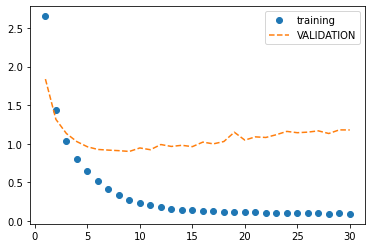

In [15]:
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")

plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()

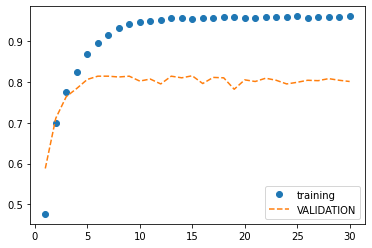

In [16]:
history_dict=history.history
loss_values=history_dict["accuracy"]
val_loss_values=history_dict["val_accuracy"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")

plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()

NUESTRA RED HACE OVERFITTING EN ALGUN PUNTO, MIENTRAS QUE EN VALIDACIÓN SE ESTANCA Y NO ES CAPAZ DE PREDECIRLA

In [18]:
## LAS EPOCAS TAMBIEN TIENEN MUCHO QUE VER EN EL DESEMPEÑO DE NUESTRO MODELO, NO LO ITEREMOS MAS VECES DE LO QUE ES POSIBLE
model.evaluate(x_test,y_test)


71/71 [==============================] - 2s 6ms/step - loss: 1.3804 - accuracy: 0.7823


[1.380368947982788, 0.7822796106338501]

In [21]:
## HAGAMOS PREDICCIONES

predictions=model.predict(x_test)
predictions[0]

### TENEMOS UNA CAPA DE SALIDA DE 46 NEURONAS, Y CADA NEURONA TIENE UN PESO

71/71 [==============================] - 0s 5ms/step


array([4.02876452e-08, 3.67744605e-07, 2.69382205e-09, 9.93538558e-01,
       4.78317076e-03, 1.99820871e-09, 4.85961705e-12, 1.35848404e-06,
       4.93797765e-04, 5.48075832e-07, 5.62857679e-07, 6.06721092e-04,
       3.30688090e-06, 1.63913523e-06, 1.97716865e-08, 4.16101764e-10,
       5.15002421e-06, 1.02325215e-08, 5.85908197e-07, 5.15137508e-04,
       1.36653962e-05, 2.71604058e-05, 8.28225044e-09, 2.70362563e-07,
       4.36646830e-10, 5.92640319e-08, 1.30138067e-09, 4.17298951e-09,
       7.32956835e-07, 5.15484366e-08, 8.17550017e-07, 2.32288073e-08,
       6.90358718e-07, 2.62456112e-10, 4.93447260e-07, 3.60198484e-08,
       4.97927476e-06, 1.21312438e-09, 1.12023146e-08, 3.43344381e-10,
       1.85949443e-08, 1.52639790e-09, 1.26871864e-11, 1.41885148e-09,
       1.32605655e-16, 7.03484826e-09], dtype=float32)

In [22]:
np.sum(predictions[0]) ## MODELOS PROBABILISTICOS

1.0000001

In [23]:
## AHORA COMO INTERPRETAMOS LOS DATOS, MEDIANTE LA PROBABILIDAD MAS ALTA:
np.argmax(predictions[0])

3